In [8]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon

import shapefile

import numpy as np
import matplotlib.pyplot as plt
import io
import cv2
import glob


In [15]:
aari_path = r'E:\\python_workfile\\sea_ice_classification\\data\\mask\\aari\\'

In [9]:

# define a function which returns an image as numpy array from figure

def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=180)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


In [10]:
def draw_aari_icetype(file,save_path):
    fig = plt.figure(figsize=(9, 9))
    ax1 = fig.add_subplot(111)
    fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 
    # ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
    m.drawmapboundary()

    shp_info = m.readshapefile(file,'aari_arc',drawbounds=False)
    colors = {-9:'cyan',8:'y',82: 'b',83:'blueviolet',86:'g',95:'brown'}

    for info, shp in zip(m.aari_arc_info, m.aari_arc):
        type_a = int(info['SA'])
        fast_ice = int(info['FA'])
        if type_a in colors.keys():
            poly = Polygon(shp, facecolor=colors[type_a], lw=3)  
            ax1.add_patch(poly)
        if fast_ice in colors.keys():
            poly = Polygon(shp, facecolor=colors[fast_ice], lw=3)  
            ax1.add_patch(poly)
    plt.savefig(save_path,dpi=180)
#     plt.show()
    return fig

In [11]:
dir_path = r'H:\\remote_sensing_data\\sea_ice_type\\aari\\'
files = glob.glob(dir_path + '*.shp')
# shps = shapefile.Reader(file)
# shp = shps.shapeRecord()
# shps_pandas = geopandas.read_file(file+'.shp')
# shps.plot()


20190820
20190827
20190903
20190910
20190917
20190924
20191001
20191008
20191015
20191029
20191105
20191112
20191119
20191126
20191203
20191210
20191217
20191224
20191231
20200107


<ipython-input-10-2362b2c35fce>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9, 9))


20200114
20200121
20200128
20200204
20200211
20200218
20200225
20200303
20200310
20200317
20200324
20200331
20200407
20200414
20200421
20200428
20200505
20200512
20200519
20200526
20200602
20200609
20200616
20200623
20200630
20200707
20200714
20200721
20200804
20200818
20200825
20200901
20200908
20200915
20200922
20200929
20201006
20201013
20201020
20201027
20201103
20201110
20201117
20201124
20201201
20201208
20201215
20201222


ValueError: shapefile must have lat/lon vertices  - it looks like this one has vertices
in map projection coordinates. You can convert the shapefile to geographic
coordinates using the shpproj utility from the shapelib tools
(http://shapelib.maptools.org/shapelib-tools.html)

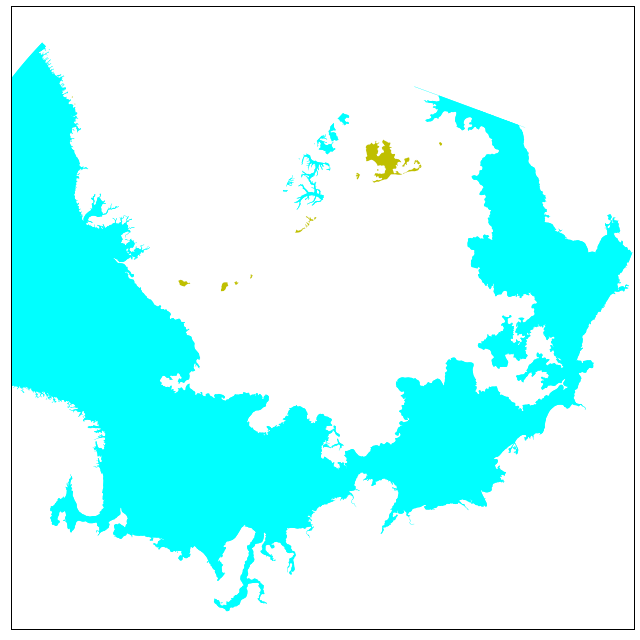

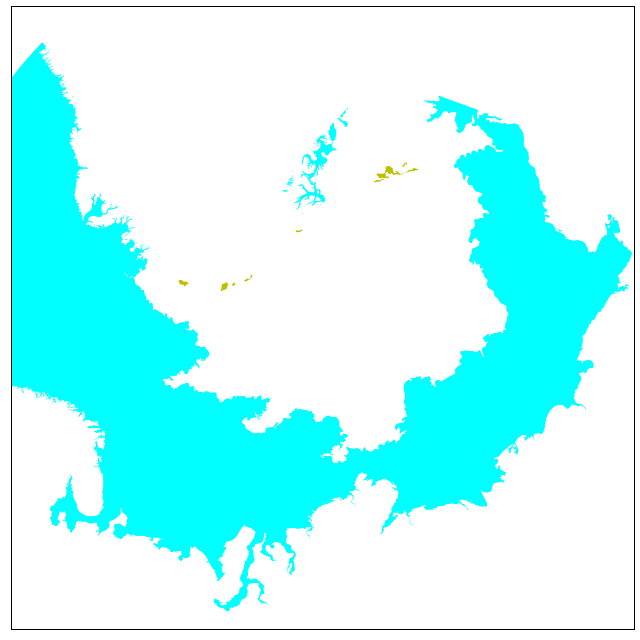

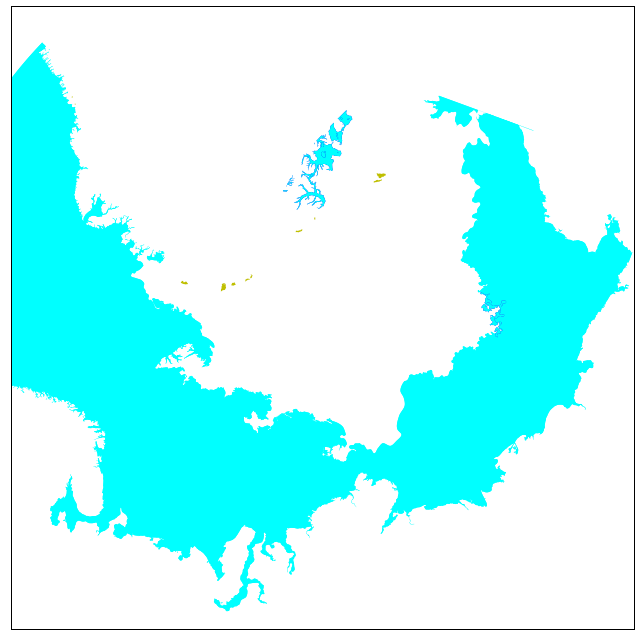

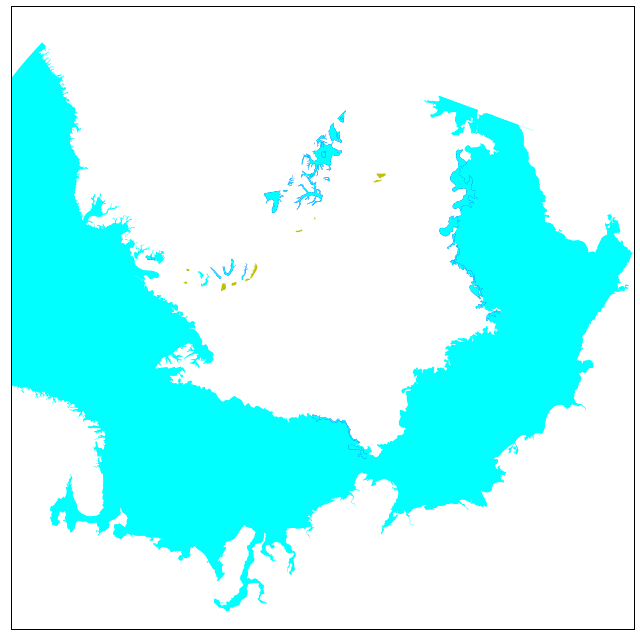

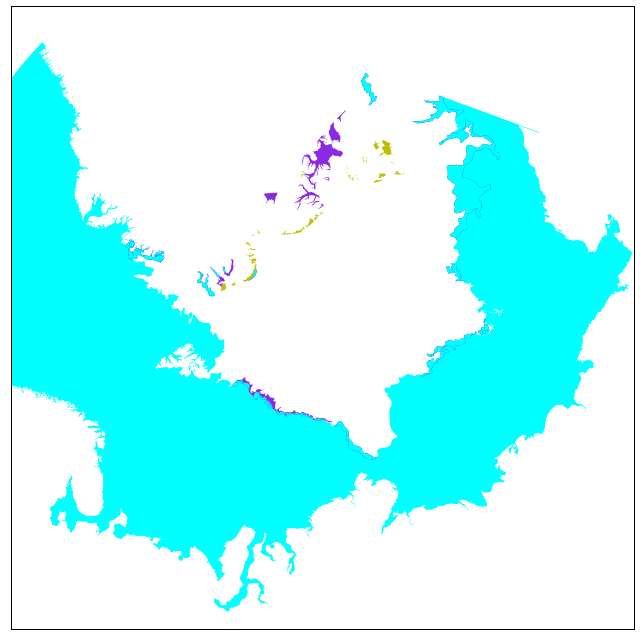

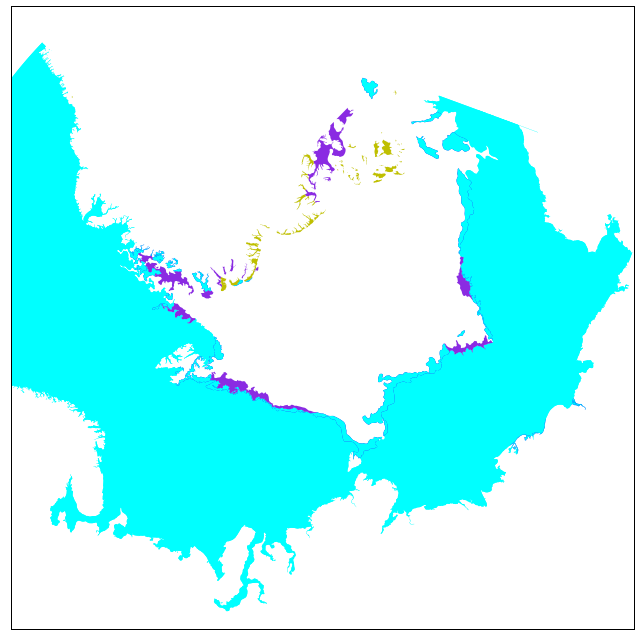

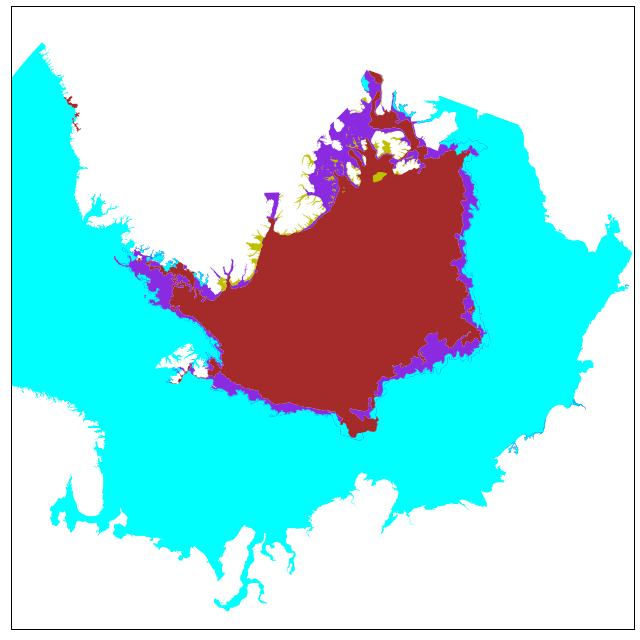

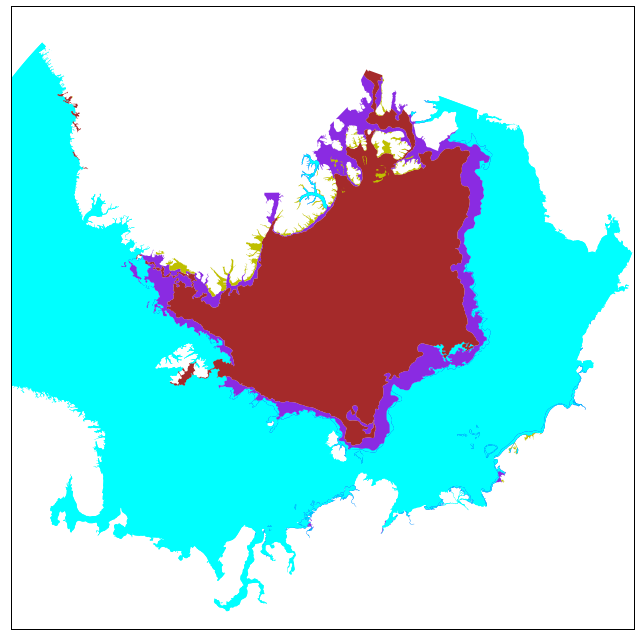

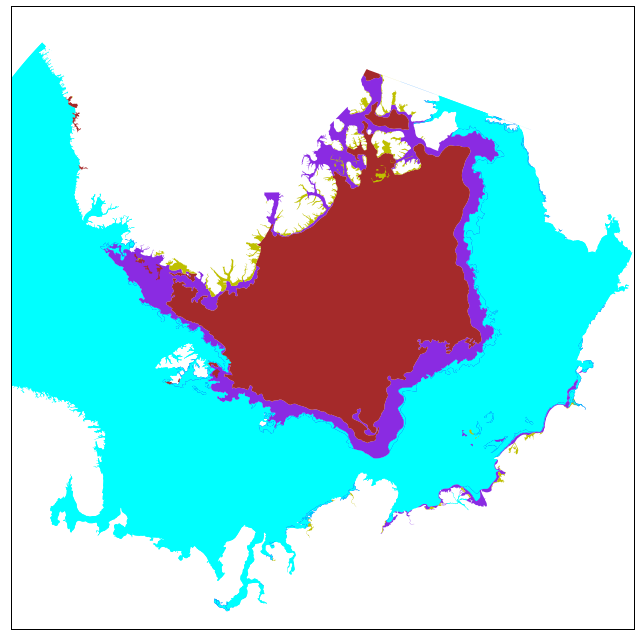

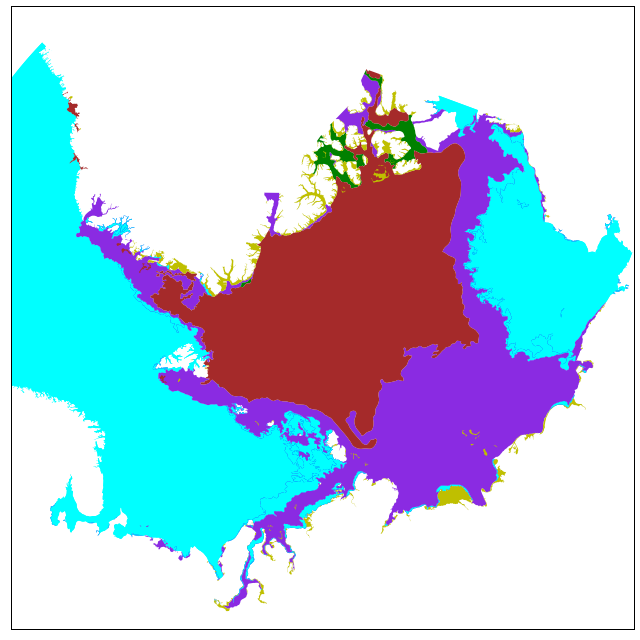

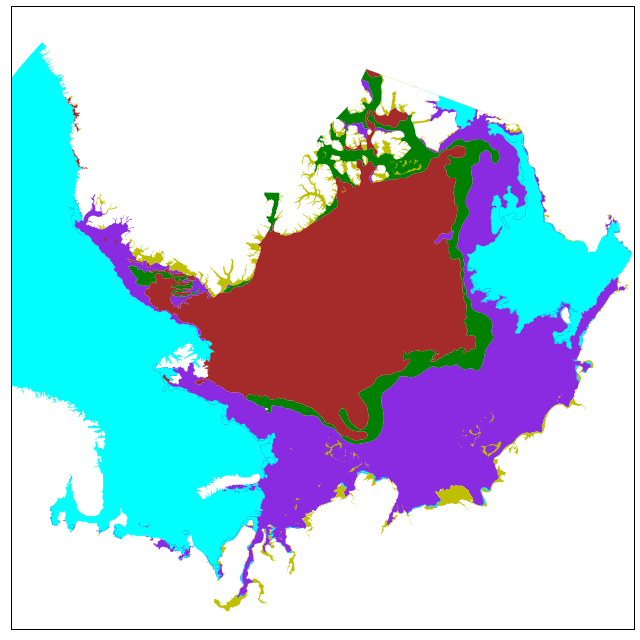

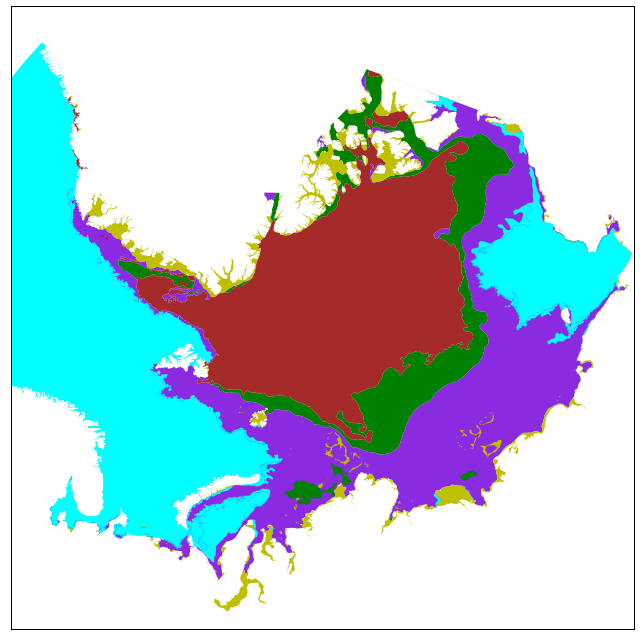

Error in callback <function flush_figures at 0x000001D5661015E0> (for post_execute):


KeyboardInterrupt: 

In [16]:
for file in files[82:]:
    file = file.split('.')[0]
    name = file.split('_')[-3]
    fig = draw_aari_icetype(file,save_path=aari_path + 'pic\\' + str(name) + '.png')
    plot_img_np = get_img_from_fig(fig)
    np.save((aari_path + 'npy\\' + str(name) + '.npy'), plot_img_np)
    print(name)


# 设置地图的坐标系和坐标显示范围


fig = plt.figure(figsize=(12.5, 12.5))
# fig.add_subplot(111)
fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 


ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
# m.fillcontinents()
m.drawmapboundary()
# m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])

shp_info = m.readshapefile(file,'aari_arc',drawbounds=False)
colors = {-9:'cyan',8:'y',82: 'b',83:'blueviolet',86:'g',95:'brown'}

for info, shp in zip(m.aari_arc_info, m.aari_arc):
    type_a = int(info['SA'])
    fast_ice = int(info['FA'])
    if type_a in colors.keys():
        poly = Polygon(shp, facecolor=colors[type_a], lw=3)  
        ax1.add_patch(poly)
    if fast_ice in colors.keys():
        poly = Polygon(shp, facecolor=colors[fast_ice], lw=3)  
        ax1.add_patch(poly)
# plt.legend()
fig.canvas.draw()
data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


# 设置地图的坐标系和坐标显示范围


fig = plt.figure(figsize=(12.5, 12.5))
# fig.add_subplot(111)
fig.set_tight_layout(True) # reduce the spaces from margin outside the axis 


ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
# m.fillcontinents()
m.drawmapboundary()
# m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])

shp_info = m.readshapefile(file,'aari_arc',drawbounds=False)
colors = {-9:'cyan',8:'y',82: 'b',83:'blueviolet',86:'g',95:'brown'}

for info, shp in zip(m.aari_arc_info, m.aari_arc):
    type_a = int(info['SA'])
    fast_ice = int(info['FA'])
    if type_a in colors.keys():
        poly = Polygon(shp, facecolor=colors[type_a], lw=3)  
        ax1.add_patch(poly)
    if fast_ice in colors.keys():
        poly = Polygon(shp, facecolor=colors[fast_ice], lw=3)  
        ax1.add_patch(poly)
# plt.legend()
fig.canvas.draw()
data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')


In [43]:
for file in glob.glob(r'E:\python_workfile\sea_ice_classification\npy\aari_'+'*.npy'):
    pic = np.load(file)
    plt.imshow(pic)
    plt.close()

E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200519.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200526.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200602.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200609.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200616.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200623.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200630.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200707.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200714.npy
E:\python_workfile\sea_ice_classification\npy\aari_ice_type_20200721.npy


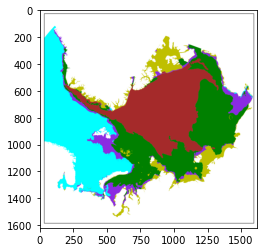

In [48]:
pic = np.load(glob.glob(r'E:\python_workfile\sea_ice_classification\npy\aari_'+'*.npy')[1])
plt.imshow(pic)
